In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
data= pd.read_csv('abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
data['Sex']= data['Sex'].replace(['F', 'M', 'I'], [0, 1, 2])

In [11]:
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.503697,-0.516450,-0.477850,-0.501511,-0.459731,-0.505693,-0.499103,-0.401445
Length,-0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


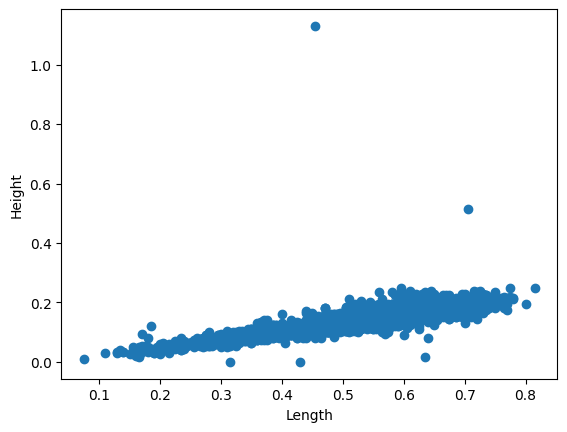

In [18]:
plt.scatter(data['Length'], data['Height'])
plt.xlabel('Length')
plt.ylabel('Height')
plt.show()

In [19]:
x_train = np.array(data['Length'])
y_train = np.array(data['Height'])

In [20]:
x_train.shape

(4177,)

In [21]:
x_train= x_train.reshape(-1, 1)
x_train.shape
x_train, y_train

(array([[0.455],
        [0.35 ],
        [0.53 ],
        ...,
        [0.6  ],
        [0.625],
        [0.71 ]]),
 array([0.095, 0.09 , 0.135, ..., 0.205, 0.15 , 0.195]))

In [24]:
#  w = slope of the line
# w = (X.T * X)^-1 * X.T * Y

w= np.matmul(  np.matmul(np.linalg.inv( np.matmul(x_train.T  , x_train) ) , x_train.T ) , y_train )

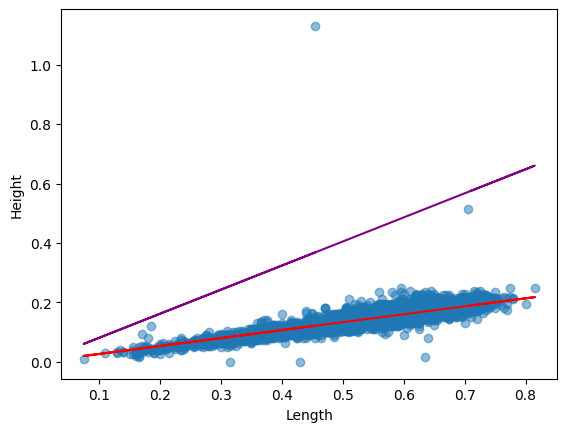

In [27]:
plt.scatter(data['Length'], data['Height'], alpha=0.5)
plt.plot(x_train, w*x_train, color='red')
plt.plot(x_train, 0.81*x_train, color='purple')
plt.xlabel('Length')
plt.ylabel('Height')
plt.show()

In [28]:
# predict
new_length= 5 #x
y_pred= w*new_length
print(y_pred)

[1.33676465]


In [ ]:
class LLS:
    def __init__(self):
        self.w = w

    def fit(self, x_train, y_train):
        w= np.matmul(np.matmul(np.linalg.inv( np.matmul(x_train.T  , x_train) ) , x_train.T ) , y_train )


    def predict(self, w, x_test):
        y_pred = x_test * w
        return y_pred